In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
import pandas as pd

# Replace the path with the location where the file is saved on your computer
file_path = r"C:\Users\bhava\Downloads\house_prices_dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())



   sqft_living  bedrooms  bathrooms  floors  condition  zipcode    price
0         1360         2          4       1          1    98039   669751
1         4272         3          4       2          4    98042  1486658
2         3592         1          4       1          2    98021  1073981
3          966         1          4       2          4    98019   731590
4         4926         2          4       1          3    98007  1417214


In [4]:
data.info()  # Check for missing values and data types
data.describe()  # Get statistical summary of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  1000 non-null   int64
 1   bedrooms     1000 non-null   int64
 2   bathrooms    1000 non-null   int64
 3   floors       1000 non-null   int64
 4   condition    1000 non-null   int64
 5   zipcode      1000 non-null   int64
 6   price        1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


,sqft_living,bedrooms,bathrooms,floors,condition,zipcode,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,2.544000,1.476000,2.989000,98049.776000,1.060960e+06
std,1255.514921,1.427564,1.133732,0.499674,1.415939,28.693399,2.697566e+05
min,503.000000,1.000000,1.000000,1.000000,1.000000,98000.000000,4.189160e+05
25%,1749.500000,2.000000,2.000000,1.000000,2.000000,98024.000000,8.483805e+05
50%,2862.500000,3.000000,3.000000,1.000000,3.000000,98051.000000,1.069258e+06
75%,3849.500000,4.000000,4.000000,2.000000,4.000000,98075.000000,1.276480e+06
max,4999.000000,5.000000,4.000000,2.000000,5.000000,98099.000000,1.704741e+06


In [5]:
# Drop the target column 'price' from the features (X)
X = data.drop('price', axis=1)  # Features

# Assign 'price' as the target variable (y)
y = data['price']  # Target variable (house price)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict house prices on the test set
y_pred = model.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² Score: 0.9990605294401604
Mean Absolute Error (MAE): 6879.146505610221
Mean Squared Error (MSE): 66949373.521811634
Root Mean Squared Error (RMSE): 8182.259683107817


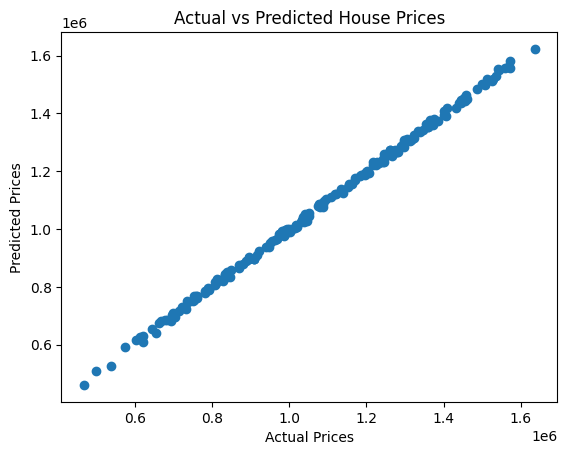

In [9]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


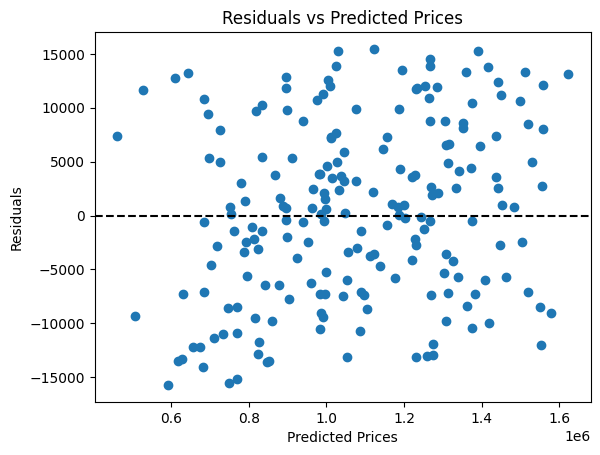

In [11]:

residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()
